<a href="https://colab.research.google.com/github/maskmo/Data-Mining/blob/main/Probability_Assignement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Question 1

### Part A

In [ ]:
import numpy as np #importing necessary libraries
import scipy.stats as st

In [ ]:
dist = np.random.binomial(size=50, n=1, p=0.5) #creating a generator of 50 bernoulli distributed outcomes to model the random reviews of probability 1/2

In [ ]:
#checking by numerical method
def bern_prob(test_number):
  count = 0
  for i in range(test_number):
    dist = np.random.binomial(size=50, n=1, p=0.5)
    if np.sum(dist) == 25:
      count += 1
  return (count / test_number)
bern_prob(1000000)

0.112436

In [ ]:
# probability of exactly 25 positive approvals
print((np.math.comb(50,25))/((2)**50))

0.11227517265921705


### Part B

In [ ]:
p = 0.5
n = 50
y = 24.5
x = 25.5
mean_y = n * p
var_y = n * p * (1-p)
std_y = np.sqrt(var_y)
z1 = (y - mean_y)/std_y
z2 = (x - mean_y)/std_y
print((st.norm.cdf(z2)) - st.norm.cdf(z1))

0.11246291601828484


## Question 2

To find the probability of drawing 0011, the coin has a $1/2$ chance of landing on heads. The draw from urn 0 has $1/9$ chance of being a 0 ball twice. Then from urn 0 the chance of drawing a 1 is $1/3$, then drawing a 1 from urn 1 has a $1/6$ chance.
There is a $1/2$ chance of the coin landing on tails. Then a $5/6$ chance of drawing a 0. Then moving back to the 0 urn there is a $1/3$ chance of drawing a 0, a $2/3$ chance of drawing a 1, and a $1/6$ chance of drawing a 1 from the 1 urn.

In [ ]:
prob0011 = (1/2)*((1/3)+(5/6))*(1/3)*(2/3)*(1/6)
print(prob0011)

0.021604938271604937


## Question 3

In [ ]:
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

In [ ]:
#Creating mean and covariance spaces
means = np.array([0,0])
covariances = np.array([[1,-1],[-1,5]])
# #Generating two sample spaces with range [-1,1] and 100 values
# x = np.linspace(-1,1,100)
# y = np.linspace(-1,1,100)
# #creating the gridspace
# X, Y = np.meshgrid(x,y,indexing = 'xy')
# #return dimensions of arrays, and create a 3D space containing X and Y
# pos = np.empty(X.shape+(2,))
# pos[:,:,0] = X
# pos[:,:,1] = Y
# #Generating bivariate normal space
# dist = multivariate_normal(means, covariances)
# #generate the pdf of the bivariate gaussian
# pdf = dist.pdf(pos)


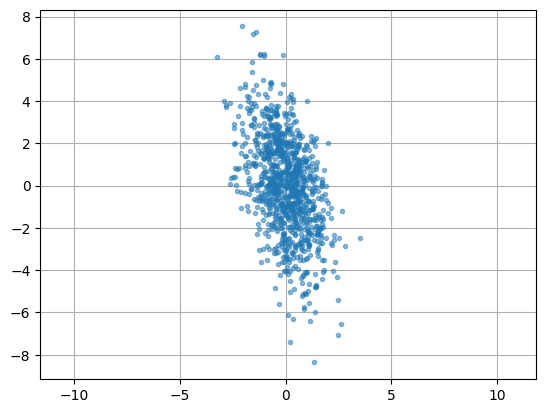

In [ ]:
# x,y = np.random.default_rng().multivariate_normal(means, covariances, size = 5000, method='cholesky').T
# plt.plot(x, y)
# plt.show()
rng = np.random.default_rng()
pts = rng.multivariate_normal(means, covariances, size=1000, method="cholesky") #Professor allows the use of high level APIs straight out of numpy
plt.plot(pts[:, 0], pts[:, 1], '.', alpha=0.5)
plt.axis('equal')
plt.grid()
plt.show()

## Questions 4

In [ ]:
import pandas as pd
from pandas._libs.lib import u8max

In [ ]:
data = pd.read_csv("/content/nyc-east-river-bicycle-counts.csv")
df = pd.DataFrame(data["Brooklyn Bridge"])

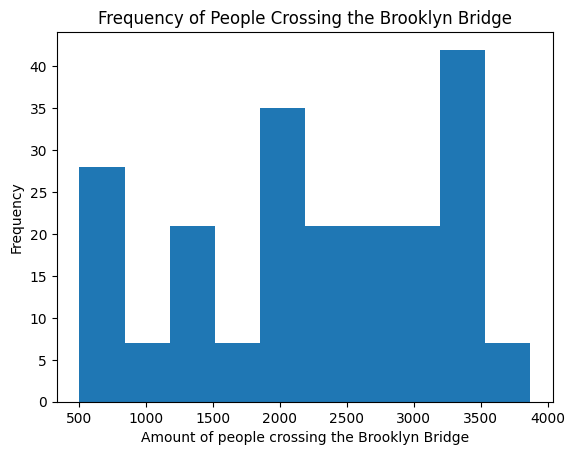

Mean: Brooklyn Bridge    2269.633333
dtype: float64


In [ ]:
plt.hist(df)
plt.title("Frequency of People Crossing the Brooklyn Bridge")
plt.xlabel("Amount of people crossing the Brooklyn Bridge")
plt.ylabel("Frequency")
plt.show()
mean_df = df.mean()
print("Mean:", mean_df)

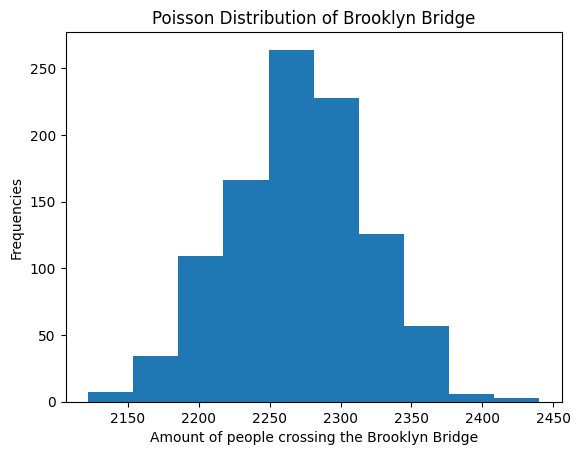

Mean: 2270.333


In [ ]:
#simulate poisson dist
# mean = df.mean()/df.count()
#np.random.poisson
## My attempt at a poisson generator.
# def poisson(mew):
#   n = 0
#   pp = 0
#   nume = mew
#   const = np.exp(-1*mew)
#   fact = 1
#   u = np.random.uniform(0,1)
#   while (pp < u):
#     pp = pp + (const*nume/fact)
#     n += 1
#     nume = nume*mew
#     fact = fact*n
#   return (pp if pp > 0 else const)
#
# poisson(mean)
sample = np.random.poisson(mean_df, 1000)
plt.hist(sample)
plt.title("Poisson Distribution of Brooklyn Bridge")
plt.xlabel("Amount of people crossing the Brooklyn Bridge")
plt.ylabel("Frequencies")
plt.show()
print("Mean:", sample.mean())